# Can we predict the presence of heart disease in patients based on their trestbps and thalach
### -Project report

### Yucong Pei 75320754

Heart disease, or cardiovascular disease, is known as the leading cause of death across the globe, accounting for a significant portion of death rates. It includes a variety of conditions that may cause detrimental effects on the heart and blood vessels.

In this project, I aim to use the dataset originating from UCI Heart Disease to build a predictive model that can identify the presence of heart disease in patients based on their health predictors. By observing the data, I believe that resting blood pressure (trestbps) and maximum achieved heart rate (thalach) can be two predictors that classify the disease. So my predictive question is: "Can we predict the presence of heart disease in patients based on their trestbps and thalach"?

The specific dataset I will apply for my paper is the processed Switzerland database, which we can access: https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data

### Methods: 
* variables:
  The columns of this dataset are a list of predictors and their explanations are given by the UCI website:
  1. age - the age of a patient
  2. sex - sex
  3. cp - chest pain type
  4. trestbps - resting blood pressure(mmHg)
  5. choi - serum cholestoral(mg/dl)
  6. fbs - fasting blood sugar > 120 mg/dl
  7. restecg - resting electrocardiographic results
  8. thalach - maximum heart rate achieved
  9. exang - exercise included angina
   10. oldpeak - induced depression
   11. slope - the slope of the peak exercise ST segment
   12. ca - number of major vessels
   13. thal 
   14. num - here it is replaced by diagnose - diagnosed or notum)


## loading data
First of all, we load in several `librabry packages`, and download `switzerland.data` online and read the url using the `read_csv` function.

In [1]:
#load library packages
library(tidyverse)
library(repr)
library(tidymodels)
library(repr)
library(RColorBrewer)
options(repr.matrix.max.rows = 6)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

In [2]:
#load switzerland data into R and set names for each column
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
heart_data <- read_csv(url, col_names = c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", 
                                         "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"))
heart_data

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ca, thal
dbl (12): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


## wrangling and cleaning the data

To wrangle and clean the data to the necessary format for performing classification and subsequent visualization, we typically need to clean and transform the columns of the dataset into the appropriate format. According to the website, the variables: `sex`, `cp`, `fbs`, `restcg`, `exang`, `slope`, and `thal` are factor variables. We need the `mutate` funtion to change their format from `<dbl>` to `<fct>`

In [3]:
#wrangling the data, changing all the "?"s to NA
heart_data <- heart_data|>
    filter(ca == "?")|>
    mutate(ca = NA)|>
    bind_rows(heart_data|> filter(ca!="?"))

#converting the columns into the correct data type
heart_data <- heart_data |>
  mutate(sex = as.factor(sex),
  cp = as.factor(cp),
  ca = as.numeric(ca),
  thal = as.factor(thal) ,
  fbs = as.factor(fbs),
  restecg = as.factor(restecg),
  exang = as.factor(exang),     
  slope = as.factor(slope),)
heart_data

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<dbl>
52,1,3,138,223,0,0,169,0,0.0,1,NA,3.0,0
43,1,4,132,247,1,2,143,1,0.1,2,NA,7.0,1
58,1,2,125,220,0,0,144,0,0.4,2,NA,7.0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
68,1,4,144,193,1,0,141,0,3.4,2,2,7.0,2
57,1,4,130,131,0,0,115,1,1.2,2,1,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1,3.0,1


for better understanding, num = 0 represents absense of heart disease,num≠0 represents the presence of heart disease, I will use conditional mutate 
to create a new "diagnose" column, where "presense" means diagnosed, "absense" means not diagnosed.

In [42]:
heart_data <- heart_data |>
mutate(diagnose = case_when(num == 1 ~ "presence",
num == 2 ~ "presence",
num == 3 ~ "presence",
num == 4 ~ "presence",                          
num == 0 ~ "absence")) |>
mutate(diagnose = as.factor(diagnose))
heart_data

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,diagnose
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<dbl>,<fct>
52,1,3,138,223,0,0,169,0,0.0,1,NA,3.0,0,absence
43,1,4,132,247,1,2,143,1,0.1,2,NA,7.0,1,presence
58,1,2,125,220,0,0,144,0,0.4,2,NA,7.0,0,absence
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
68,1,4,144,193,1,0,141,0,3.4,2,2,7.0,2,presence
57,1,4,130,131,0,0,115,1,1.2,2,1,7.0,3,presence
57,0,2,130,236,0,2,174,0,0.0,2,1,3.0,1,presence


## summary and analysis of the data

First step after cleaning and wrangling the data is to split it into training and test sets in preparation for classification modeling. tidymodels' `initial_split` function will do so. In using a ratio such as 75% training set and 25% test set, this method separates the data into different frames for further training and testing. I will use the training dataset and an exploratory data and summarize it.

In [43]:
heart_split <- initial_split(heart_data, prop = 0.75, strata = diagnose)
heart_training <- training(heart_split)
heart_testing <- testing(heart_split)

num_obs <- nrow(heart_training)
heart_training |>
  group_by(diagnose) |>
  summarize(
  count = n(),
  percentage = n() / num_obs * 100)

diagnose,count,percentage
<fct>,<int>,<dbl>
absence,123,54.18502
presence,104,45.81498


we have roughly 54% patients diagnosed with heart disease and 46% not diagnosed with heart disease.
Now we visualize the training data by creating a scatter plot.

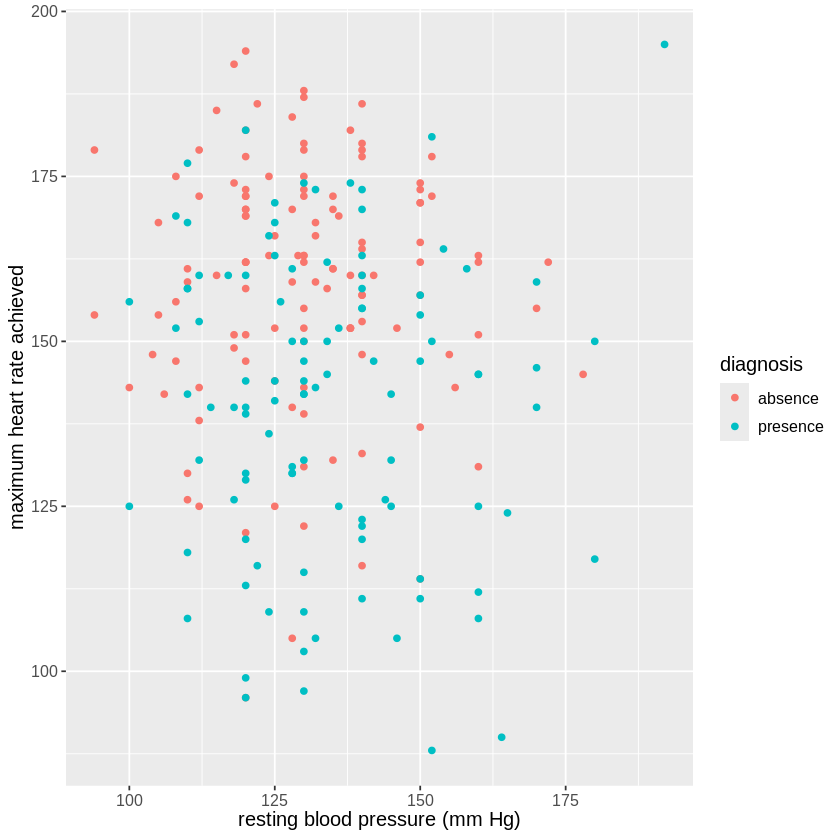

In [44]:
heart_plot <- heart_training |>
select(trestbps, thalach, diagnose) |>
#we use trestbps and thalach to predict whether a patient is diagnosed or not
ggplot(aes(x = trestbps, y = thalach, colour = diagnose)) +
geom_point() +
labs(x = "resting blood pressure (mm Hg)", y = "maximum heart rate achieved",
     colour = "diagnosis") +
theme(text = element_text(size = 12))
heart_plot

 From the start of the project, by looking at the data, I found trestbps and thalach may be two driving factors for diagnosing heart disease. So I selected these two columns, along with the diagnosis column, and created a scatter plot. I used the color function to distinguish whether each point represents diagnosed/not. By observing th eplot we can find out that most of the "presence" points are clustered in the upper middle area, which represents a combination of high maximum heart rate and relatively low resting blood pressure. I can primarily conclude that patients diagnosed with heart disease tend to have high maximum heart rate and low resting blood pressure. I will try to prove this in the following discussion.

## KNN model - finding the best K

In this project, I will use the knn model to predict the presence of heart disease in a new observation (here, to classify it as either present or absent), this algorithm allows us to identify the type of new observation based on the Euclidean distance between surrounding points, and to make predictions based on the majority type of these neighbors. Then I will use cross-validation of the training set to figure out the best K to use. After all, I will plug in K into the testing data to evaluate the accuracy, and precision of the classifier.

* Creating a model 

In [45]:
set.seed(1234)

# creating a recipe, using 
heart_recipe <- recipe(diagnose ~ trestbps + thalach, data = heart_training) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

# creating a specification, tuning the classifier
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

# performing a 5-fold cross-validation 
heart_vfold <- vfold_cv(heart_training, v = 5, strata = diagnose)

# creating a parameter in a range of values.
k_vals <- tibble(neighbors = seq(from = 1, to = 100, by = 5))

# fit the knn model again using vfold
heart_knn_results <- workflow() |>
  add_recipe(heart_recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = heart_vfold, grid = k_vals) |>
  collect_metrics()


# filter out the rows that represent accuracy
accuracies <- heart_knn_results |>
  filter(.metric == "accuracy") 
accuracies

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.5682213,5,0.03271395,Preprocessor1_Model01
6,accuracy,binary,0.6264207,5,0.02784613,Preprocessor1_Model02
11,accuracy,binary,0.6743478,5,0.02741545,Preprocessor1_Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
86,accuracy,binary,0.6612077,5,0.02754021,Preprocessor1_Model18
91,accuracy,binary,0.6567589,5,0.02031851,Preprocessor1_Model19
96,accuracy,binary,0.6564646,5,0.02136667,Preprocessor1_Model20


Now we have generated the dataset for different Ks, we can decide which number of neighbors is best by plotting the accuracy versus K, the peak value represents the best K.

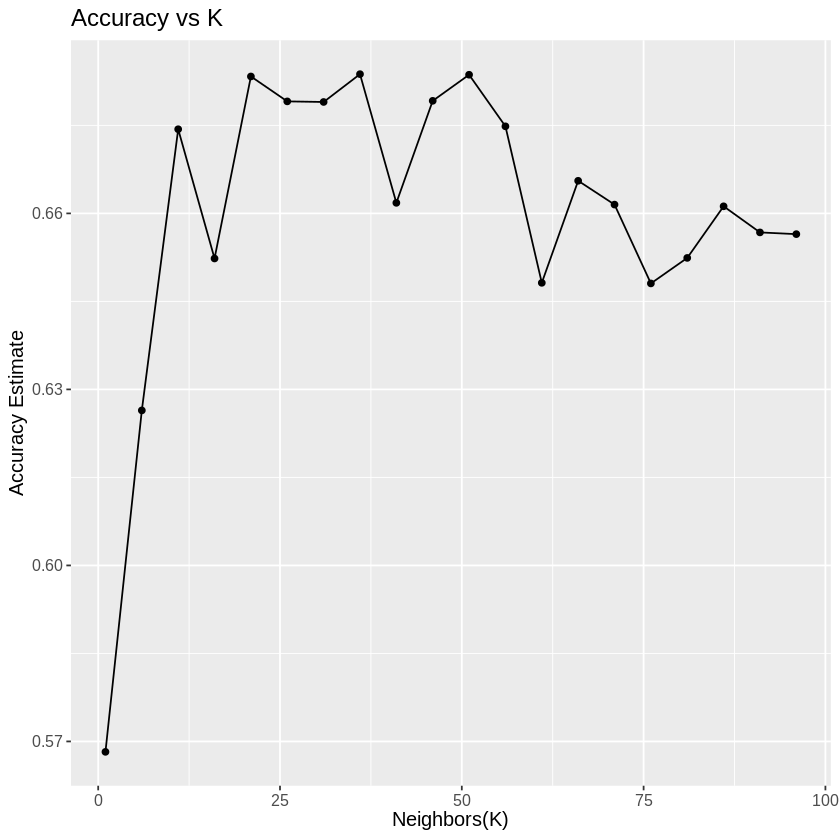

In [46]:
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors(K)", y = "Accuracy Estimate") +
  ggtitle("Accuracy vs K") +
  theme(text = element_text(size = 12))
accuracy_vs_k

According to the plot above, it seems a bit unclear to tell which K has the highest accuracy. We will use the `arrange` and `slice` function to figure out an accurate K.

In [47]:
max_accuracies <- accuracies |>
  arrange(desc(mean)) |>
  head(1) |>
  pull(neighbors) 
max_accuracies

[1] 36

## KNN model - building & evaluating

Now we have got the best K, 26! Let's plug this K into the model to build our ultimate knn model.
Then, I will use the testing data to evaluate its accuracy and precision.

In [56]:
#building the final knn model
final_recipe <- recipe(diagnose ~ trestbps + thalach, data = heart_training) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

final_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = max_accuracies) |>
  set_engine("kknn") |>
  set_mode("classification")

final_fit <- workflow() |>
  add_recipe(final_recipe) |>
  add_model(final_spec) |>
  fit(data = heart_training)
final_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(36,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.3259912
Best kernel: rectangular
Best k: 36

In [57]:
#testing the model using the testing set
#list accuracy, precision, and confusion matrix
heart_test_predictions <- predict(final_fit, heart_testing) |>
bind_cols(heart_testing) 
metrics <- heart_test_predictions |>
  metrics(truth = diagnose, estimate = .pred_class) |>
  filter(.metric == "accuracy")
metrics

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7236842


In [58]:
heart_test_predictions |>
  precision(truth = diagnose, estimate = .pred_class, event_level = "first")

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,binary,0.7380952


In [55]:
fruit_mat <- heart_test_predictions |> 
       conf_mat(truth = diagnose, estimate = .pred_class)
fruit_mat

          Truth
Prediction absence presence
  absence       31       11
  presence      10       24

As shown above, the model delivers a decent performance with an accuracy of $72.37%$ and a precision of $73.81$. This indicates that the model can correctly predict most of the cases. However, I doubt that it is accurate enough for medical applications, where medical incidents may occur by chance. This model shows promising results, but it still requires improvement.

## Discussion

* #### Findings:

My model can roughly answer the question from the begining. Yes, we can predict the diagnosis of heart disease based on resting blood pressure (trestbps) and maximum achieved heart rate (thalach). The knn model developed for predicting the presence of heart disease based on trestbps and thalach yieded an ovr 70% of accuracy. The findings align with expectations to some extent. 

However, further enhancements could be made for it to achieve better performance:
* Expand the dataset of trestbps and thalach, though doing so we may need a better computer)
* Explore more parameters (such as restecg) to this model, add more dimensions to the model, thus optimizing its performance
* Build alternative, more accurate models

* #### Impacts:
  
  The development of this classifier can promote early detection based on the health data of patients who are at risk but may not yet have symptoms. This allows doctors to intervene early with preventive measures, and lower the risk of severe outcomes such as heart attacks.